# Demo Notebook

In this notebook, we will demonstrate our network that we built in the training notebook. We will use it to make some predictions on some example images, and try to understand its strengths and weaknesses, and the reasons behind this.

### Images
I have collected the images by taking photos of various shoes found in my house. These images are all unseen to the model.

In [2]:
# magic commands
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [52]:
# imports
from tensorflow.keras.models import load_model
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.layers import Layer, Conv2D, MaxPooling2D
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random

In [64]:
# we must define our colour filter layer again as we are using it in our loaded model
class ColourFilterLayer(Layer):
    def __init__(self, **kwargs):
        super(ColourFilterLayer, self).__init__(**kwargs)
        self.colour_filter = [random.uniform(0,1), random.uniform(0,1), random.uniform(0,1)]
        
    def build(self, input_shape):
        super(ColourFilterLayer, self).build(input_shape)

    def call(self, inputs, **kwargs):
        return inputs * self.colour_filter

    def compute_output_shape(self, input_shape):
        return input_shape

model = load_model('best_network.h5', custom_objects={'ColourFilterLayer': ColourFilterLayer})

In [9]:
# load images
path = "examples"
pathnames = [os.path.join(path, filename) for filename in sorted(os.listdir(path))]

imgs = [load_img(img_path, target_size=(224, 224)) for img_path in pathnames]

In [10]:
# process images for predictions
img_arrays = []
for img in imgs:
    img_array = img_to_array(img)
    img_array = preprocess_input(img_array)
    img_array = tf.expand_dims(img_array, 0)
    img_arrays.append(img_array)

In [65]:
# logarithmic-scaled bar chart to display our predictions
def bar_chart_probabilities(probabilities):
    classes = ['Adidas', 'Nike', 'Onitsuka']
    
    plt.bar(classes, probabilities, color=['blue', 'green', 'red'])
    plt.xlabel('Classes')
    plt.ylabel('Confidence Scores')
    plt.title('Confidence Scores for Different Classes')
    plt.yscale('log')
    plt.show()

### Image 1 - Adidas ADI 2000
First, we have a photo of a pair of Adidas ADI 2000 shoes. These appear to be a simple example to begin with, clearly a pair of Adidas shoes to the human eye. We will make our prediction and display the results.

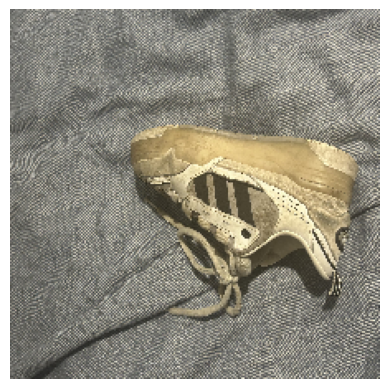

In [21]:
adidas_adi = imgs[0]
plt.figure()
plt.axis('off')
plt.imshow(adidas_spezials)

In [22]:
adidas_adi = img_arrays[0]
adidas_adi_predictions = model.predict(adidas_adi)
adidas_adi_predictions

1/1 [==============================] - 0s 227ms/step


array([[9.9996877e-01, 3.6732993e-06, 2.7589080e-05]], dtype=float32)

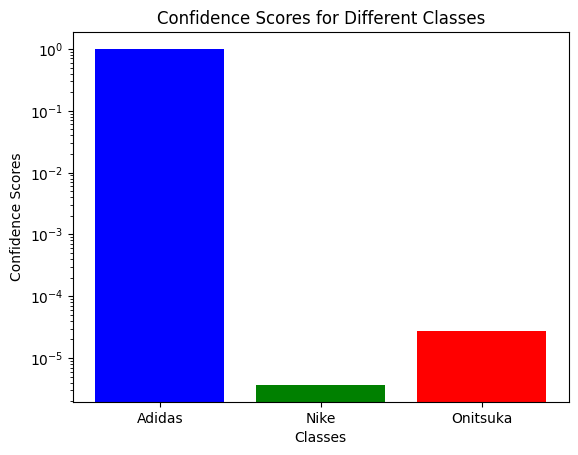

In [23]:
bar_chart_probabilities(adidas_adi_predictions[0])

We were correct, very confidently predicting Adidas. So far, so good.

### Image 2 - Adidas Spezials

Next, we have a pair of Adidas Spezial shoes. Again, the 3 stripes logo appears quite clear, so we don't expect that this will be difficult to predict.

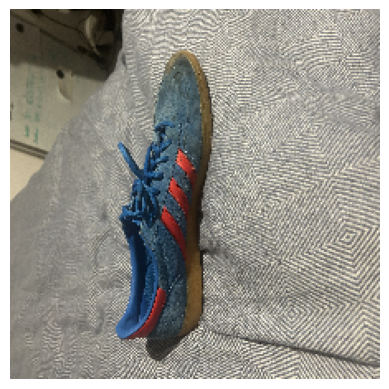

In [24]:
adidas_spezials = imgs[1]
plt.figure()
plt.axis('off')
plt.imshow(adidas_spezials)

In [25]:
adidas_spezial_data = img_arrays[1]
adidas_spezial_predictions = model.predict(adidas_spezial_data)
adidas_spezial_predictions

1/1 [==============================] - 0s 228ms/step


array([[1.4175978e-16, 9.9999952e-01, 5.0159031e-07]], dtype=float32)

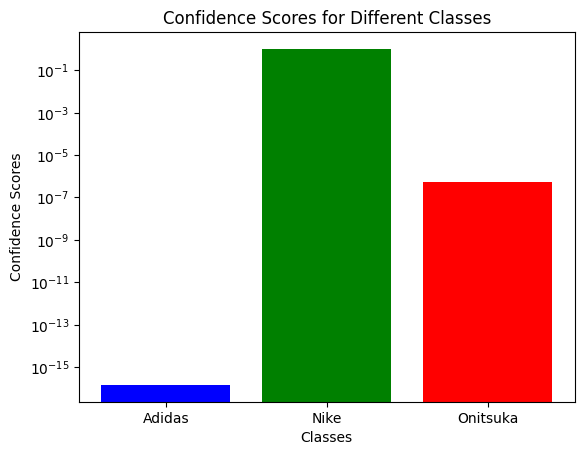

In [27]:
bar_chart_probabilities(adidas_spezial_predictions[0])

This prediction was incorrect. We predicted Nike, and were extremely confident that it was **not** Adidas. The reason for this isn't clear, perhaps the shadow on the three stripes made them less clear to our model. Other factors such as the orientation, the coloured heel and the grainy image (due to the resizing) may have contributed.

## Image 3 - Nike running shoes
Next, we will look at a pair of Nike running shoes. On this pair of shoes, a Nike swoosh is visible, but it is longer than usual, giving it an appearance that is closer to the long, curved Onitsuka logo. This may cause our model some confusion.

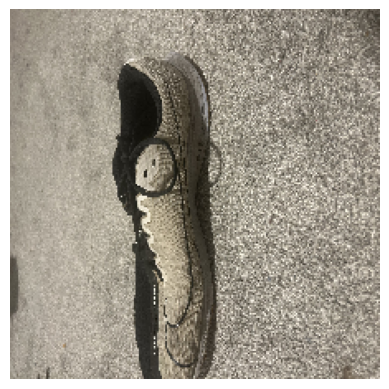

In [28]:
nike_running = imgs[2]
plt.figure()
plt.axis('off')
plt.imshow(nike_running)

In [30]:
nike_running_data = img_arrays[2]
nike_running_predictions = model.predict(nike_running_data)
nike_running_predictions

1/1 [==============================] - 0s 235ms/step


array([[4.1146305e-13, 9.6990371e-01, 3.0096272e-02]], dtype=float32)

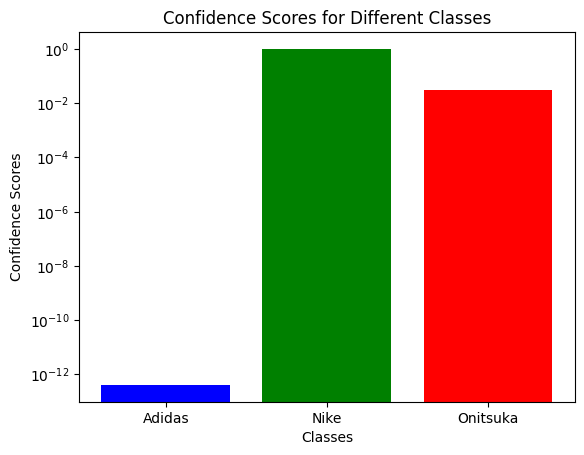

In [31]:
bar_chart_probabilites(nike_running_predictions[0])

We see that our model correctly identified the Nikes, but was considering the Onitsukas, which makes sense to the human eye as noted above.

## Image 4 - Nike 97's
This image shows a pair of Nike 97's. There is a visible Nike swoosh, although it is quite small. We will see if the size of this distinguishing factor affects our model's prediction.

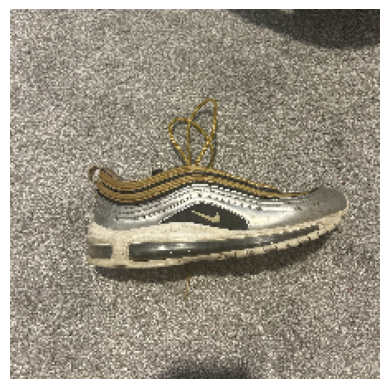

In [32]:
nike_97s = imgs[3]
plt.figure()
plt.axis('off')
plt.imshow(nike_97s)

In [34]:
nike_97s_data = img_arrays[3]
nike_97s_predictions = model.predict(nike_97s_data)
nike_97s_predictions

1/1 [==============================] - 0s 251ms/step


array([[2.7747639e-02, 9.7224820e-01, 4.2245260e-06]], dtype=float32)

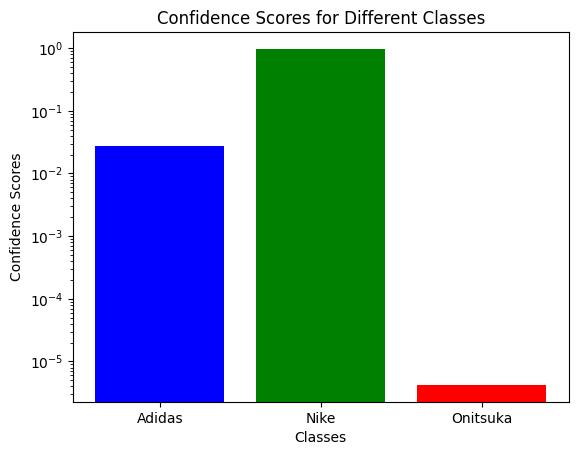

In [35]:
bar_chart_probabilites(nike_97s_predictions[0])

Again our model was correct, selecting Nike quite confidently.

## Image 5 - Ontisuka Tiger
This image is more of a challenge. We are looking at a photo of the Onitsuka Tiger Mexico 66 shoe. This angle focuses on the heel of the shoe, with the black tab indicating the brand. However, most of the images we showed our model of the Onitsuka featured the stripe logo. If our model relies heavily on the presence of the shoe's primary logo, it will probably struggle here.

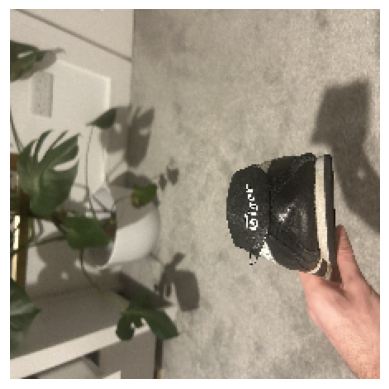

In [36]:
onitsuka_rear = imgs[4]
plt.figure()
plt.axis('off')
plt.imshow(onitsuka_rear)

In [37]:
onitsuka_rear_data = img_arrays[4]
onitsuka_rear_predictions = model.predict(onitsuka_rear_data)
onitsuka_rear_predictions

1/1 [==============================] - 0s 235ms/step


array([[8.3503619e-06, 9.9999166e-01, 5.9204395e-16]], dtype=float32)

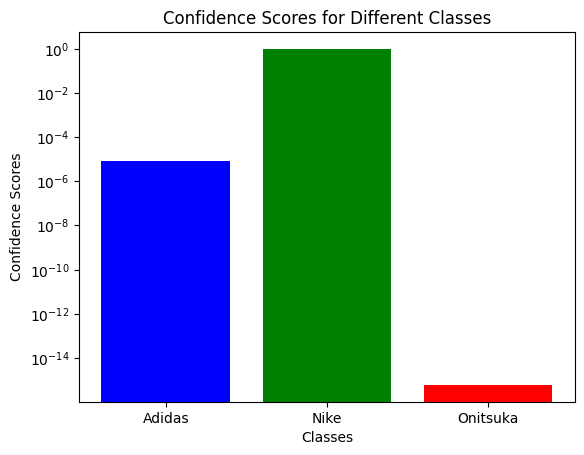

In [38]:
bar_chart_probabilites(onitsuka_rear_predictions[0])

Our model was unable to identify the Onitsuka correctly. This is probably to be expected by looking at the image, but it serves to highlight the model's inability to understand context, as a human could easily identify this shoe by reading the words.

## Image 5 (pt2) - Onitsuka Tiger
We will look at the same shoe from the more "typical" angle (at least for our training data).

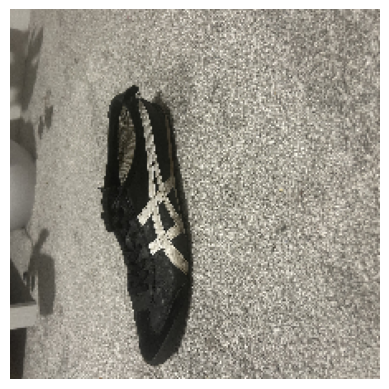

In [39]:
onitsuka_side = imgs[5]
plt.figure()
plt.axis('off')
plt.imshow(onitsuka_side)

In [40]:
onitsuka_side_data = img_arrays[5]
onitsuka_side_predictions = model.predict(onitsuka_side_data)
onitsuka_side_predictions

1/1 [==============================] - 0s 219ms/step


array([[9.9186701e-01, 8.0729155e-03, 6.0088780e-05]], dtype=float32)

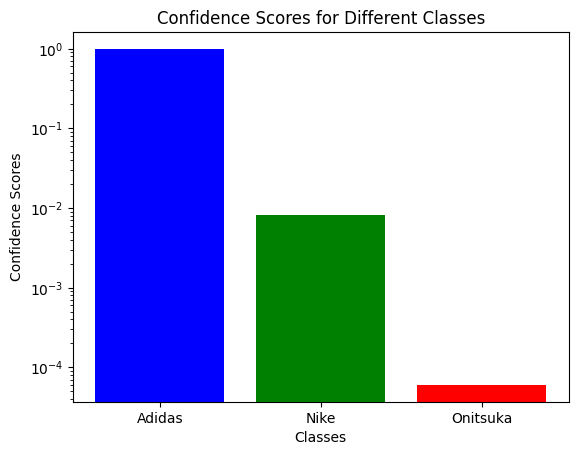

In [42]:
bar_chart_probabilites(onitsuka_side_predictions[0])

Our model was incorrect again. I believe this is more of an issue with our training dataset. Looking through it, Adidas has a number of examples of shoes that are black with white stripes, which appear reasonably similar. A larger, more diverse dataset would hopefully fix this incorrect prediction.

Another factor that may have caused this confusion is our data augmentation. The combination of zoom and rotation can either curve or straighten the stripes on a shoe, the main distinguishing factor between Adidas and Onitsuka. Perhaps this augmentation should have been adjusted to better preserve the vital differences between our classes.

## Image 6 - Reebok Club C
Finally, we will give our network a shoe from a brand that is not one of our three classes. We are using an image of a Reebok Club C. Ideally, our model would recognise that the shoe does not closely match any of the classes, and would therefore give a relatively even confidence for each of the three classes. We will see how our model deals with this now.

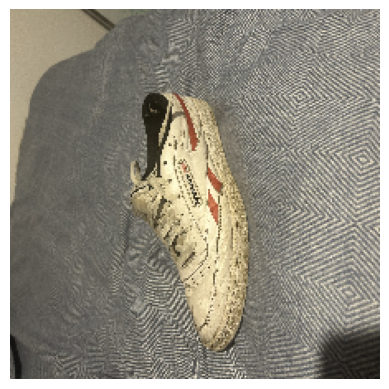

In [61]:
reebok = imgs[6]
plt.figure()
plt.axis('off')
plt.imshow(reebok)

In [62]:
reebok_data = img_arrays[5]
reebok_predictions = model.predict(reebok_data)
reebok_predictions

1/1 [==============================] - 0s 127ms/step


array([[9.9186701e-01, 8.0729155e-03, 6.0088780e-05]], dtype=float32)

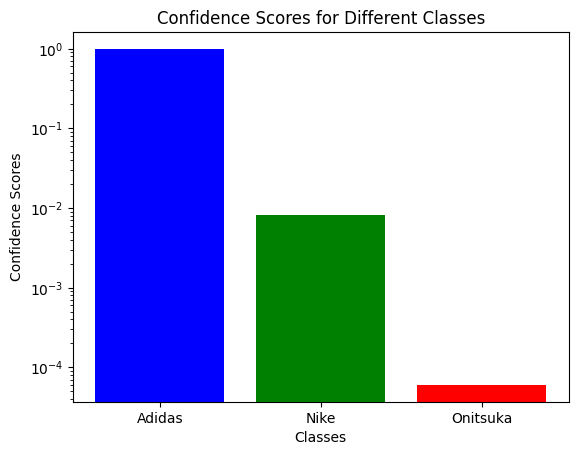

In [63]:
bar_chart_probabilites(reebok_predictions[0])

Our model predicted an Adidas shoe. While this can be defended (this Reebok shoe looks quite similar to some [Adidas shoes](https://www.adidas.ie/continental-80-shoes/G27706.html)), we would like our model to be more agnostic in this situation. This is true for other examples, like image 5 (pt1). Generally, we will be more tolerant of an uncertain prediction than a confident incorrect one. To do this, we could train with more data of varying degrees of quality, and focus on minimising our loss value.

Overall, we can see that our model has picked up on some information that is useful to predicting a shoe brand. With an accuracy of around 70%, this is far better than a dummy classifier, that should have an accuracy of 33%. However, there is still a way to go, as we saw some obvious images incorrectly classified in this demo.

To improve our predictions, we could try to improve the quality (definition) of our data. When we resize to 224x224, we see that our images become quite grainy. We could either use a different base model to ResNet50 that doesn't mandate a 224 square input, or crop our images before resizing.

Another thing to note is the similarity in the distribution of our confidence (image 5.2 and 6, image 5.1 and 4, image 2 and 3). This implies our network has taken some "shortcuts" that we would ideally train out, ie it has some idea of a Nike/Onitsuka shoe, and predicts some combination of the two, unless an example has some characteristic that makes it obviously one or the other. With more data and more complex training, we would expect this to leave.